# CLASE 4.5: TEMAS ESPECIALES.
---

## Introducción.
Durante este último periplo en nuestra asignatura de "Análisis de Datos", vamos a cubrir algunos tópicos un tanto más avanzados de manera general, y que se derivan de la combinación de las librerías **Sympy** y **Scipy** en la resolución de problemas de análisis de varios tipos. En particular, nos abocaremos a estudiar como resolver problemas relativos a integración numérica y la resolución –también numérica– de ecuaciones diferenciales ordinarias (EDOs) y parciales (EDPs) mediante algunos recursos especializados.

Como siempre, partiremos importando todas las librerías que utilizaremos durante esta sección:

In [1]:
# Importación de librerías.
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
import pandas as pd
import seaborn as sns
import sympy

In [2]:
# Importación de módulos.
from scipy import integrate as I
from scipy import linalg as L
from scipy import sparse as S
from scipy.sparse import linalg as SL

In [3]:
# Setting de parámetros de graficación.
sns.set()
plt.rcParams["figure.dpi"] = 100 # Resolución de nuestras figuras.
plt.style.use("bmh") # Template de estilo.

In [4]:
# Inicializamos la impresión resultados simbólicos de Sympy.
sympy.init_printing()

In [5]:
%matplotlib notebook

## Integración numérica.
Vamos a comenzar esta sección discutiendo algunos métodos de integración numérica que podemos implementar en Python. En particular, estamos interesados, en primera instancia, en aproximar numéricamente integrales definidas del tipo

$$I=\int^{b}_{a} f\left( x\right)  dx$$
</p> <p style="text-align: right;">$(5.1)$</p>

Donde $f$ es una función continua, al menos, en el intervalo cerrado $[a,b]$. Los valores $a$ y $b$ son los correspondientes límites de integración. La integral, en este caso, representa el área bajo la gráfica de $f$ para $a\leq x\leq b$. Por ejemplo, si $f\left( x\right)  =\cosh \left( \frac{1}{1+\sqrt{x} -x^{2}} \right)$, entonces podemos construir rápidamente la interpretación geométrica de la integral (5.1) para $a=0.5$ y $b=2$ como sigue:

In [6]:
# Definimos nuestra función.
def f(x):
    return 1/np.cosh(1 + np.sqrt(x) - x**2)

In [7]:
# Definimos el rango de evaluación y los valores de f.
x = np.linspace(start=0, stop=3, num=200)
y = f(x)

In [8]:
# Definimos convenientemente los límites de integración.
a = np.linspace(start=0.5, stop=2.0, num=100)
b = f(a)

<IPython.core.display.Javascript object>


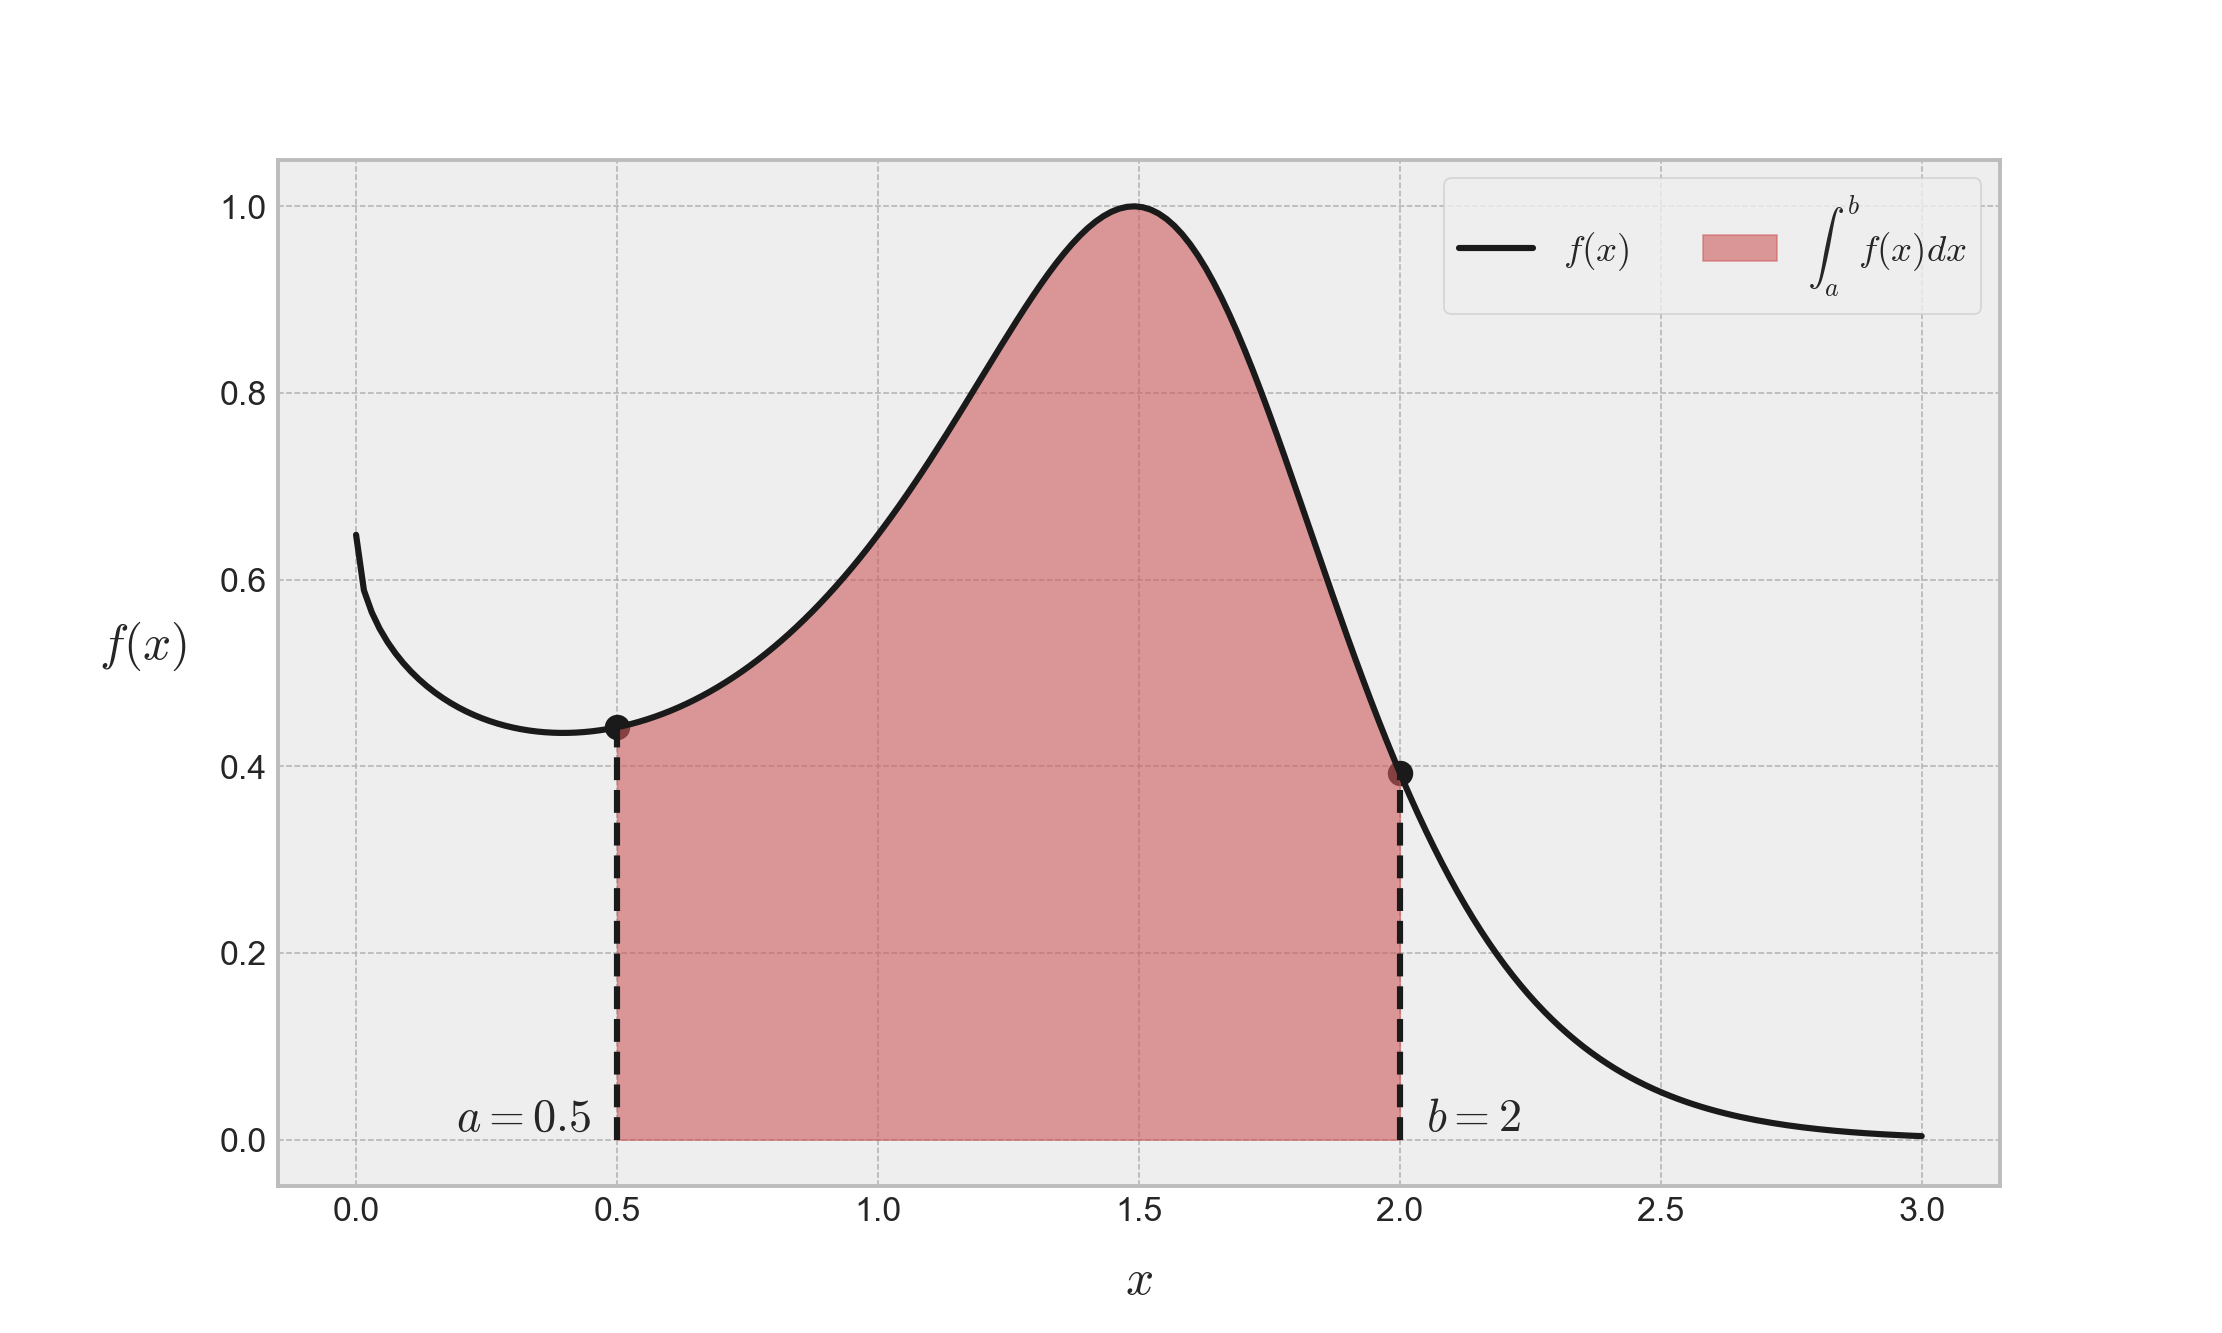

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, color="k", linewidth=2, label=r"$f(x)$")
ax.plot([0.5, 0.5], [0, f(0.5)], linestyle="--", color="k")
ax.plot([2.0, 2.0], [0, f(2.0)], linestyle="--", color="k")
ax.scatter(x=0.5, y=f(0.5), marker="o", color="k", s=60)
ax.scatter(x=2.0, y=f(2.0), marker="o", color="k", s=60)
ax.fill_between(x=a, y1=0, y2=b, color="indianred", alpha=0.6, label=r"$\int^{b}_{a} f(x)dx$")
ax.text(x=0.45, y=0.01, s=r"$a=0.5$", ha="right", size=15)
ax.text(x=2.05, y=0.01, s=r"$b=2$", ha="left", size=15)
ax.legend(loc="upper right", fontsize=12, frameon=True, ncol=2)
ax.set_xlabel(r"$x$", fontsize=16, labelpad=10)
ax.set_ylabel(r"$f(x)$", fontsize=16, labelpad=25, rotation=0);

Existen varias fórmulas que permiten construir aproximaciones de mayor y menor calidad para una integral como la mostrada en (5.1). Una de las metaheurísticas más utilizadas en la práctica corresponden a las **fórmulas de cuadratura integral**, que se basan en expresiones del tipo

$$\int^{b}_{a} f\left( x\right)  dx\approx \sum^{n}_{k=0} w_{k}f\left( x_{k}\right)  +\epsilon_{n}$$
</p> <p style="text-align: right;">$(5.2)$</p>

Donde $w_{i}$ son ponderadores conocidos como **pesos de cuadratura** para las $n+1$ evaluaciones de $f$ consideradas en la fórmula (5.2), siendo $a=x_{0}$ y $b=x_{n}$. Naturalmente, $x_{i}\in [a, b]$. Además, $\epsilon_{n}$ es llamado **error de cuadratura**, el cual depende del número de términos totales de la suma. En general, dicho término puede no considerarse en la práctica, aunque siempre es bueno estimar su valor, a fin de tener presente los errores asociados al usar la correspondiente fórmula de cuadratura para aproximar el valor de la integral original. Como resulta evidente, tanto $n$ como el espaciamiento entre los puntos interiores a la partición del intervalo $[a, b]$ que se utiliza en la sumatoria (5.2) corresponden a hiperparámetros que definen la calidad de la aproximación y, por extensión, su complejidad computacional.

### Fórmulas de cuadratura de Newton-Cotes.
Cuando la función $f$ es reemplazada por un interpolador polinomial $P(x)$ construido a partir de los $n+1$ nodos $\left\{ x_{k}\right\}^{n}_{k=0}$, estando dichos nodos equiespaciados los unos con respecto a los otros, la expresión (5.2) es denominada **fórmula de cuadratura de Newton-Cotes**. La interpolación del integrando $f$ mediante un polinomio $P$ de grado $r$ dara lugar a una fórmula de cuadratura de Newton-Cotes de $r+1$ sumandos. Por ejemplo, si $r=1$, entonces la fórmula (5.2) se transforma en

$$\int^{b}_{a} f\left( x\right)  dx\approx \sum^{1}_{k=0} w_{k}f\left( x_{k}\right)  =\frac{b-a}{2} \left( f\left( a\right)  +f\left( b\right)  \right)$$
</p> <p style="text-align: right;">$(5.3)$</p>

El peso de cuadratura es el mismo en ambos sumandos, debido a que los nodos están equiespaciados y simplemente hemos dividido en intervalo $[a,b]$ en dos mitades, las cuales tienen una longitud $w=(b-a)/2$. La ecuación (5.3) suele denominarse como **regla del trapecio**, debido a que, al reemplazar el integrando $f$ por un polinomio de primer orden (es decir, una función lineal) entre $a$ y $b$, el área bajo dicho polinomio es equivalente a la de un trapecio de bases $f(a)$ y $f(b)$ y altura $b-a$, lo que justifica geométricamente la fórmula (5.3).

La regla del trapecio, dada su naturaleza, es exacta para polinomios hasta de grado uno, y su término de error puede definirse como $\epsilon =-f^{\prime \prime }\left( \xi \right)  \left( b-a\right)^{3}/12$, donde $\xi$ es *algún* punto interior al intervalo $[a, b]$. Dicho término de error no siempre será posible de construir, puesto que, en general, no sabremos la definición de la función $f$, y sólo contaremos con las correspondientes evaluaciones de la misma sobre una serie de puntos.

Por otro lado, si $r=2$, la función $f$ será reemplazada por un polinomio de interpolación cuadrático. En este caso, dicha interpolación se realiza en los nodos $x_{0}=a, x_{1}=m$ y $x_{2}=b$, donde $m=(a+b)/2$. De esta manera, la fórmula (5.2) toma la forma:

$$\int^{b}_{a} f\left( x\right)  dx\approx \sum^{2}_{k=0} w_{k}f\left( x_{k}\right)  =\frac{b-a}{6} \left( f\left( a\right)  +4f\left( m\right)  +f\left( b\right)  \right)$$
</p> <p style="text-align: right;">$(5.4)$</p>

Los pesos de cuadratura para los extremos del intervalo $[a, b]$ son los mismos ($w_{0}=w_{2}=(b-a)/6$), mientras que el peso relativo al punto medio $m$ del intervalo $[a, b]$ es mayor que los anteriores ($w_{1}=2(b-a)/3$). La ecuación (5.4) se denomina **regla de Simpson**. Dada su naturaleza, es exacta para polinomios hasta de grado dos, y su término de error puede definirse como $\epsilon =-h^{5}f^{\left( 4\right)  }\left( \xi \right)  /90$, donde $\xi$ es *algún* punto interior al intervalo $[a, b]$, $h=(b-a)/2$ y $f^{4}$ corresponde a la cuarta derivada de $f$. Como antes, estimar este término de error exige el conocimiento de $f$, lo que implica que no siempre será posible hacerlo.

Por supuesto, podemos extender los procedimientos anteriores con polinomios de orden cada vez mayor y obtener fórmulas cada vez más exactas, pero que arrastran los mismos problemas de oscilación que hemos visto en los casos de interpolación mediante polinomios de alto grado. Con frecuencia, la fórmula de Newton-Cotes suele considerarse hasta el caso $r=3$, de donde resulta la **regla 3/8 de Simpson**:

$$\int^{b}_{a} f\left( x\right)  dx\approx \sum^{3}_{k=0} w_{k}f\left( x_{k}\right)  =\frac{3h}{8} \left[ f\left( a\right)  +3f\left( \frac{2a+b}{3} \right)  +3f\left( \frac{a+2b}{3} \right)  +f\left( b\right)  \right]$$
</p> <p style="text-align: right;">$(5.5)$</p>

Y cuyo término de error es $\epsilon =-3h^{5}f^{\left( 4\right)  }\left( \xi \right)  /80$, donde nuevamente $\xi$ es *algún* punto interior al intervalo $[a, b]$, $h=(b-a)/2$ y $f^{4}$ corresponde a la cuarta derivada de $f$.

A fin de poder disponer de versiones más exactas de las fórmulas anteriores, es posible cambiar el tipo de interpolador aplicado sobre el integrando $f$, particionando el intervalo $[a, b]$ en una mayor cantidad de nodos y construyendo interpolaciones mediante splines de grado variable. De esta manera, las fórmulas resultantes son llamadas **fórmulas compuestas de Newton-Cotes**. Por ejemplo, si hacemos uso de un spline lineal para interpolar a $f$ en los nodos resultantes de particionar a $[a,b]$, obtenemos la **fórmula compuesta de los trapecios** (la cual, naturalmente, posee un total de $n+1$ sumandos):

$$\int^{b}_{a} f\left( x\right)  dx\approx \frac{h}{2} \left[ f\left( a\right)  +2f\left( a+h\right)  +2f\left( a+2h\right)  +\cdots +f\left( b\right)  \right]  =h\left[ \frac{f\left( a\right)  +f\left( b\right)  }{2} +\sum^{n-1}_{k=1} f\left( a+hk\right)  \right]$$
</p> <p style="text-align: right;">$(5.6)$</p>

Donde $h=(b-a)/n$ corresponde al tamaño de los subintervalos (todos equidistantes) en los cuales se divide el intervalo $[a, b]$. Análogamente, el uso de splines cuadráticos y cúbicos para reemplazar al integrando $f$ dará lugar a las **fórmulas compuestas de Simpson (1/3 y 3/8)**:

$$\int^{b}_{a} f\left( x\right)  dx\approx \frac{h}{3} \left[ f\left( a\right)  +2\sum^{n/2-1}_{k=1} f\left( x_{2k}\right)  +4\sum^{n/2}_{k=1} f\left( x_{2k-1}\right)  +f\left( b\right)  \right]$$
</p> <p style="text-align: right;">$(5.7)$</p>

$$\int^{b}_{a} f\left( x\right)  dx\approx \frac{3h}{8} \left[ f\left( a\right)  +3\sum^{n/3-1}_{k=0} f\left( x_{3k+1}\right)  +3\sum^{n/3-1}_{k=0} f\left( x_{3k+2}\right)  +2\sum^{n/3-2}_{k=0} f\left( x_{3k+3}\right)  +f\left( b\right)  \right]$$
</p> <p style="text-align: right;">$(5.8)$</p>

Observamos que un hiperparámetro importante asociado a las fómulas compuestas de Newton-Cotes corresponde a la elección del espaciamiento $h$ entre los nodos de cuadratura. Es posible estimar el error de estas fórmulas seleccionando distintos espaciamientos y generando procesos de ensayo y error que permitan determinar cuánto crece dicho error con respecto al valor de $h$.

### Cuadratura de Gauss.
Las fórmulas de cuadratura de Newton-Cotes, como hemos verificado, hacen uso de nodos equiespaciados a lo largo del intervalo de integración. Un esquema de este tipo puede resultar conveniente, especialmente si el integrando se obtiene a partir de observaciones o mediciones sobre puntos ya establecidos y que cumplen con ser equidistantes los unos con los otros. Sin embargo, hay casos en los cuales dicho esquema no es óptimo. Por ejemplo, si conocemos el integrando $f$ y podemos calcular sus valores sobre valores arbitrarios interiores a $[a, b]$, entonces puede resultar beneficioso el elegir nodos que no sean equidistantes los unos con los otros. Un ejemplo de método que hace uso de nodos no equiespaciados es la **cuadratura de Gauss**, que funciona en base al uso de polinomios ortogonales, tomando como nodos las raíces de dichos polinomios, y también el intervalo donde dichos polinomios efectivamente son ortogonales.

Debido a la dependencia de las fórmulas de cuadratura de Gauss con respecto a los polinomios ortogonales escogidos, es frecuente que tales fórmulas se *sub-apelliden* con el nombre de los polinomios correspondientes. Por ejemplo, la **fórmula de cuadratura de Gauss-Legendre** hace uso de los polinomios de Legendre para definir el espaciamiento entre los nodos de interpolación y la elección del intervalo de integración. De esta manera, debido a que tales polinomios son ortogonales en el intervalo $[-1, 1]$ con respecto a la función de peso $w(x)=1$, esta fórmula de cuadratura puede escribirse como:

$$\int^{1}_{-1} f\left( x\right)  dx\approx \sum^{n}_{k=1} w_{k}f\left( x_{k}\right)$$
</p> <p style="text-align: right;">$(5.9)$</p>

Donde $n$ es el número total de nodos utilizado, $x_{k}$ son las $n$ raíces del polinomio de Legendre de grado $n$ y $w_{i}$ son los pesos de cuadratura. La elección de $x_{k}$ y $w_{k}$ es única, y es tal que la fórmula (5.9) es exacta para polinomios hasta de grado $2n-1$. Puntualmente, el cálculo de los pesos de cuadratura se realiza conforme la fórmula siguiente

$$w_{k}=\frac{2}{\left( 1-x^{2}_{k}\right)  \left[ P^{\prime }_{n}\left( x_{k}\right)  \right]^{2}  }$$
</p> <p style="text-align: right;">$(5.10)$</p>

Donde $P_{n}$ es el polinomio de Legendre de grado $n$:

$$P_{n}\left( x\right)  =\frac{1}{2^{n}n!} \frac{d^{n}}{dx^{n}} \left( x^{2}-1\right)^{n}$$
</p> <p style="text-align: right;">$(5.11)$</p>

Por ejemplo, si deseamos generar una fórmula de cuadratura de Gauss-Legendre de dos sumandos, resolvemos primero la ecuación $P_{2}(x)=0$ a fin de obtener los nodos de cuadratura. De esta manera, conforme la ecuación (5.11), se tiene que $P_{2}(x)=\frac{1}{2}(3x^{2}-1)$, por lo cual $P_{2}\left( x\right)  =0\Longleftrightarrow x_{1}=-\frac{1}{\sqrt{3} } \wedge x_{2}=\frac{1}{\sqrt{3} }$. Resolviendo ahora (5.10):

$$\begin{array}{lll}w_{1}&=&\frac{2}{\left( 1-\frac{1}{3} \right)  \underbrace{\left[ P^{\prime }_{2}\left( -\frac{1}{\sqrt{3} } \right)  \right]^{2}  }_{P^{\prime }_{2}\left( x\right)  =3x} } \\ &=&\frac{2}{\left( 1-\frac{1}{3} \right)  \left( 3\left( -\frac{1}{\sqrt{3} } \right)  \right)^{2}  } \\ &=&\frac{2}{\frac{2}{3} \cdot 3} =1\end{array} \  \wedge \  \begin{array}{lll}w_{2}&=&\frac{2}{\left( 1-\frac{1}{3} \right)  \underbrace{\left[ P^{\prime }_{2}\left( \frac{1}{\sqrt{3} } \right)  \right]^{2}  }_{P^{\prime }_{2}\left( x\right)  =3x} } \\ &=&\frac{2}{\left( 1-\frac{1}{3} \right)  \left( 3\left( \frac{1}{\sqrt{3} } \right)  \right)^{2}  } \\ &=&\frac{2}{\frac{2}{3} \cdot 3} =1\end{array}$$
</p> <p style="text-align: right;">$(5.12)$</p>

Por lo tanto, la fórmula de cuadratura de Gauss-Legendre de dos sumandos es

$$\int^{-1}_{1} f\left( x\right)  dx\approx f\left( -\frac{1}{\sqrt{3} } \right)  +f\left( \frac{1}{\sqrt{3} } \right)$$
</p> <p style="text-align: right;">$(5.13)$</p>

### Implementación en `scipy.integrate`.
**Scipy** dispone del módulo `scipy.integrate` para la resolución numérica de integrales. Dicho módulo dispone de varias funciones que pueden clasificarse en función de si disponemos o no de una definición explícita del integrando en cuestión. Si efectivamente disponemos del integrando, podemos usar las funciones `quad()`, `quadrature()` y `fixed_quad()`, las cuales emplean fórmulas de cuadratura de Gauss para la resolución de las integrales respectivas. Si no disponemos del integrando y sólo tenemos data tabular (es decir, pares $(x, y)$), podemos usar las funciones `trapz()`, `simps()` y `romb()`, que son implementaciones de las fórmulas de cuadratura de Newton-Cotes (las dos primeras, y que hacen referencia a las reglas de los trapecios y de Simpson) y de Romberg (que no discutimos teóricamente en los párrafos anteriores).

La función `quadrature()` corresponde a una rutina de cuadratura Gaussiana adaptativa, la cual llama repetidamente a la función `fixed_quad()` (que, a su vez, es una rutina de cuadratura Gaussiana de sumandos fijos), a fin de aplicar dicha función hasta obtener un número de sumandos suficiente, tal que la fórmula sea tan exacta como hayamos requerido. La función `quad()` es un envoltorio o *wrapper* de rutinas de *FORTRAN* que se caracteriza por su gran velocidad de cálculo y soporte de integración numérica impropia. Suele ser la función preferida en la mayoría de los casos para resolver integrales por medio de fórmulas de cuadratura Gaussiana y, en la práctica requiere de los siguientes argumentos: `func`, que corresponde a un `Callable` que hace el papel del integrando respectivo (en general, una función definida en Python), donde su primer argumento es el utilizado para realizar la integración; `a`, que corresponde a un número de punto flotante que define el extremo inferior del intervalo de integración; y `b`, que es otro número de punto flotante, y que define el extremo superior del intervalo de integración.

Tomemos, por ejemplo, la integral $I$, definida como

$$I=\int^{-1}_{1} \frac{dx}{1+e^{-x^{2}}}$$
</p> <p style="text-align: right;">$(5.14)$</p>

Evaluar esta integral por medio de la función `quad()` requiere, primero, de definir el integrando explícitamente en Python:

In [10]:
# Definimos el integrando.
def f(x):
    return 1 / (1 + np.exp(-x**2))

Y luego, ya podemos realizar el cálculo rápidamente:

In [11]:
# Calculamos la integral.
val, err = I.quad(func=f, a=-1, b=1)

La función `quad()` retorna el valor calculado de la integral, y el error asociado a la fórmula de cuadratura utilizada:

In [12]:
# Imprimimos en pantalla nuestros resultados.
print(f"Valor aproximado de la integral: {val}")
print(f"Error de cuadratura: {err}")

Valor aproximado de la integral: 1.1610670399866185
Error de cuadratura: 5.390126032210358e-13


Es posible definir la tolerancia asociada al error de cuadratura devenido del uso de la función `quad()` por medio del argumento opcional `epsabs`, siendo el valor por defecto igual a `1.49e-8`.

La función `quad()` es capaz igualmente de manejar integrandos que tengan algunos parámetros adicionales. Consideremos, por ejemplo, la integral $J$, definida como

$$J=\int^{-1}_{1} \frac{e^{ax^{2}+bx+c}}{abc} dx$$
</p> <p style="text-align: right;">$(5.15)$</p>

En este caso, es posible definir paramétricamente el integrando en Python como sigue:

In [13]:
# Definimos el integrando.
def g(x, a, b, c):
    return np.exp(a*x**2 + b*x + c) / (a*b*c)

Es posible definir el valor de los parámetros `a`, `b` y `c` que serán utilizados en el cálculo de la integral $J$ en la función `quad()` haciendo uso del argumento `args`, el que corresponde a una tupla donde seteamos los valores de los parámetros que son adicionales a la variable independiente respecto de la cual queremos integral. Por ejemplo, si deseamos calcular numéricamente el valor de $J$ para $a=1$, $b=-2$ y $c=-1$, bastará con escribir:

In [14]:
# Calculamos la integral conforme los parámetros previamente establecidos.
val, err = I.quad(func=g, a=-1, b=1, args=(1, -2, -1))

In [15]:
# Imprimimos en pantalla nuestros resultados.
print(f"Valor aproximado de la integral: {val}")
print(f"Error de cuadratura: {err}")

Valor aproximado de la integral: 1.1133105193157395
Error de cuadratura: 1.0369689348040958e-12


La función `quad()` puede, igualmente, trabajar numéricamente con integrales impropias, cuyos límites de integración pueden ser infinitos. Consideremos la integral $K$, definida como

$$K=\int^{+\infty }_{0} \frac{dx}{1+x^{2}}$$
</p> <p style="text-align: right;">$(5.16)$</p>

Es sencillo verificar que $K=\pi/2$. En efecto, si definimos el integrando en Python:

In [16]:
# Definimos el integrando.
def h(x):
    return 1 / (1 + x**2)

Entonces podemos resolver la integral $K$ definiendo el límite superior por medio de la representación `numpy.inf`. Así tenemos:

In [17]:
# Calculamos nuestra integral.
val, err = I.quad(func=h, a=0, b=np.inf)

In [18]:
# Imprimimos en pantalla nuestros resultados.
print(f"Valor aproximado de la integral: {val}")
print(f"Error de cuadratura: {err}")

Valor aproximado de la integral: 1.5707963267948966
Error de cuadratura: 2.5777915205519274e-10


Y ahí lo tenemos. El término de error absoluto nos permite concluir que el resultado anterior tiene al menos 9 cifras decimales correctas.

La función `quad()` puede, igualmente, trabajar con integrales impropias de segunda especie, en las cuales el integrando puede no ser continuo en todo el intervalo de integración, sin que el valor de la integral diverja. Un ejemplo es la integral $S$, definida como

$$S=\int^{1}_{-1} \frac{e^{-x^{2}}}{x} dx$$
</p> <p style="text-align: right;">$(5.17)$</p>

En este caso, el integrando es discontinuo en $x=0$, que es un valor interior al intervalo de integración $[-1, 1]$. Sin embargo, el valor de la integral no diverge, ya que, al graficar el valor del integrando sobre el intervalo de integración, podremos observar que el área bajo la curva correspondiente en efecto es finita:

In [19]:
# Definimos el integrando.
def f(x):
    return np.exp(-x**2) / x

<IPython.core.display.Javascript object>


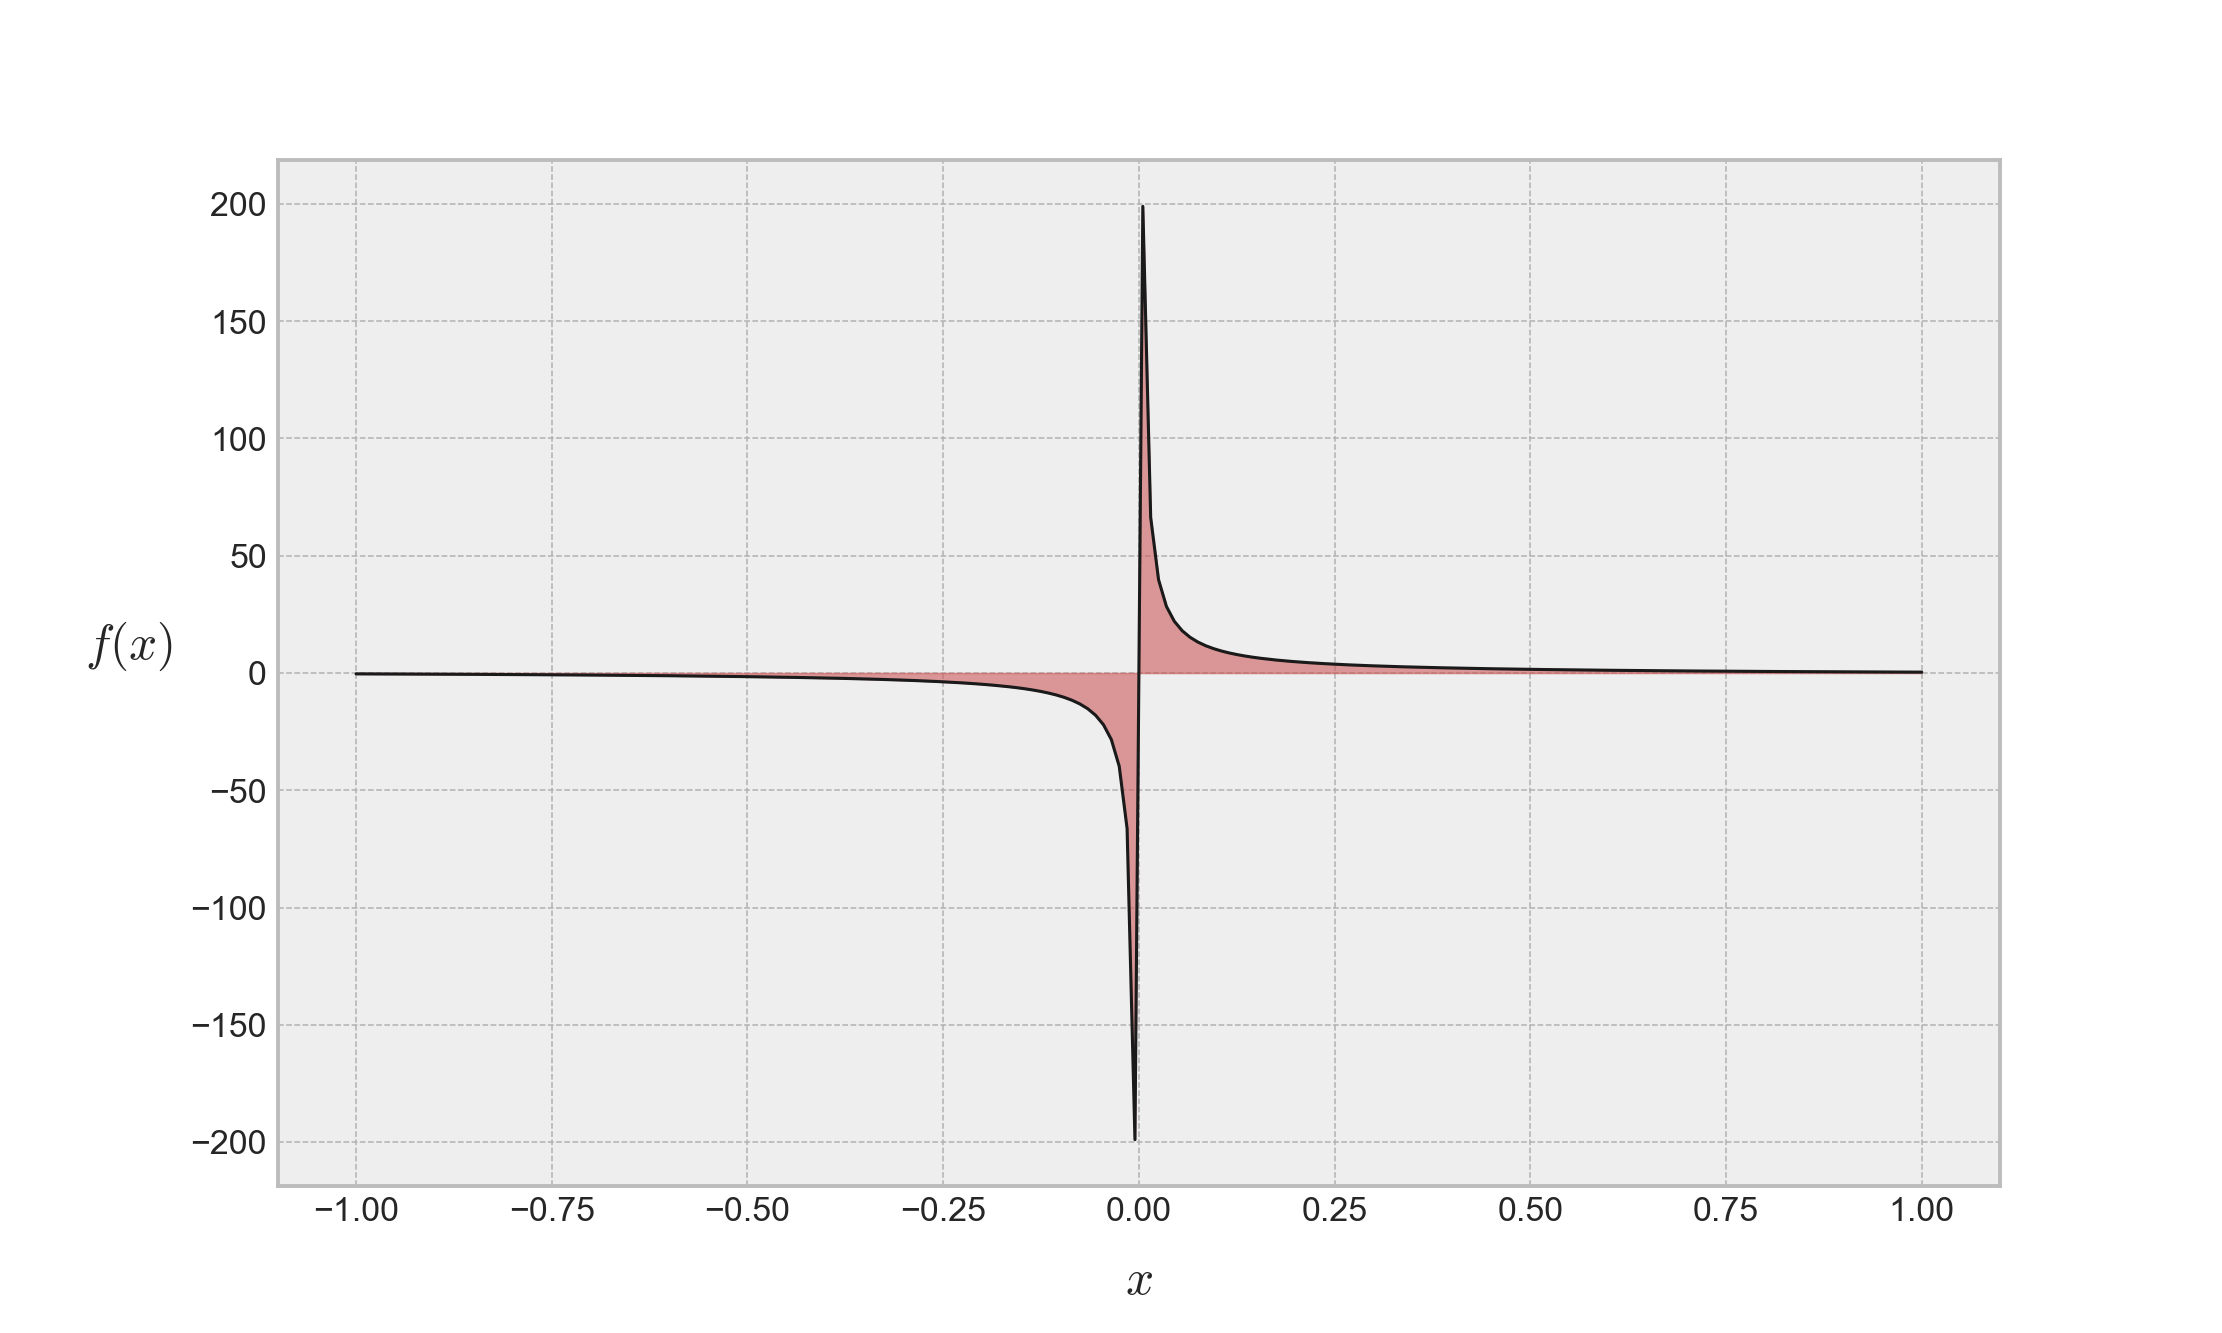

In [20]:
# Graficamos el integrando.
x = np.linspace(start=-1, stop=1, num=200)
y = f(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, color="k", linewidth=1)
ax.fill_between(x=x, y1=y, color="indianred", alpha=0.6)
ax.set_xlabel(r"$x$", fontsize=16, labelpad=10)
ax.set_ylabel(r"$f(x)$", fontsize=16, labelpad=20, rotation=0);

Dada la paridad del integrando, es evidente que el valor de la integral $S$ es igual a cero. Sin embargo, al evaluar dicha integral por medio de la función `quad()`, ésta puede fallar, ya que el integrando es discontinuo en uno de los nodos de cuadratura ($x=0$):

In [21]:
# Intentamos calcular ingenuamente la integral S.
val, err = I.quad(func=f, a=-1, b=1)

/var/folders/sn/hlgjzv2n1537dplx8bvvj1c80000gn/T/ipykernel_57444/2014452276.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-x**2) / x


In [22]:
# Imprimimos en pantalla nuestros resultados.
print(f"Valor aproximado de la integral: {val}")
print(f"Error de cuadratura: {err}")

Valor aproximado de la integral: inf
Error de cuadratura: inf


Es posible descartar algunos nodos de cuadratura a evaluar mediante el argumento `points`, el cual tiene formato de una lista de Python que espcifica tales nodos a excluir. De esta manera, es posible evaluar integrales cuyo integrando sea discontinuo igualmente mediante el uso de la función `quad()`:

In [23]:
# Ahora sí calculamos correctamente la integral S.
val, err = I.quad(func=f, a=-1, b=1, points=[0])

In [24]:
# Imprimimos en pantalla nuestros resultados.
print(f"Valor aproximado de la integral: {val}")
print(f"Error de cuadratura: {err}")

Valor aproximado de la integral: 0.0
Error de cuadratura: 0.0


Y con esto ya hemos revisado los casos de uso más frecuentes de la función `quad()` en términos de integrales unidimensionales.

Sin embargo, puede darse el caso, como ya habíamos comentado antes, que el integrando de interés sea desconocido, y sólo dispongamos de data tabular en forma de puntos $(x, y)$ sobre un intervalo de interés, del tipo $[a, b]$. Cuando este es el caso, es posible hacer uso de las fórmulas de cuadratura de Newton-Cotes para resolver numéricamente las integrales de interés.

Como ya habíamos visto en un principio, la fórmula compuesta de los trapecios y la regla compuesta de Simpson pueden implementarse en `scipy.integrate` mediante las funciones `trapz()` y `simps()`, respectivamente. Ambas funciones toman como primer argumento un arreglo `y` con los valores del integrando evaluados sobre un conjunto de puntos dentro del intervalo de integración $[a, b]$ y, opcionalmente, un arreglo `x` con los puntos sobre los cuales se ha evaluado el integrando o, alternativamente, el espaciamiento `dx` de cada subintervalo. Notemos los nodos de cuadratura no necesitan estar equiespaciados, pero deben ser conocidos con anterioridad.

Para tener una idea de como trabajan las fórmulas de cuadratura de Newton-Cotes en `scipy.interpolate`, consideremos la integral $I$ definida como

$$I=\int^{2}_{-2} \cosh \left( x\right)  dx$$
</p> <p style="text-align: right;">$(5.18)$</p>

Vamos a emplear la fórmula compuesta de los trapecios y la regla compuesta de Simpson para aproximar el valor de $I$ usando como base un total de 25 nodos de cuadratura uniformemente espaciados en el intervalo $[-2, 2]$. Para ello, primero generaremos una visualización completa de dicho problema, a fin de comprender lo que haremos a cabalidad:

In [25]:
# Definimos los límites de integración y los nodos de cuadratura.
a, b = -2, 2
q_nodes = np.linspace(start=a, stop=b, num=25)

In [26]:
# Definimos el integrando (sólo con propósitos gráficos).
def f(x):
    return np.cosh(x)

In [27]:
# Definimos el rango completo de integración.
x = np.linspace(start=a-1, stop=b+1, num=200)
x0 = np.linspace(start=a, stop=b, num=200)
xn = f(x0)

<IPython.core.display.Javascript object>


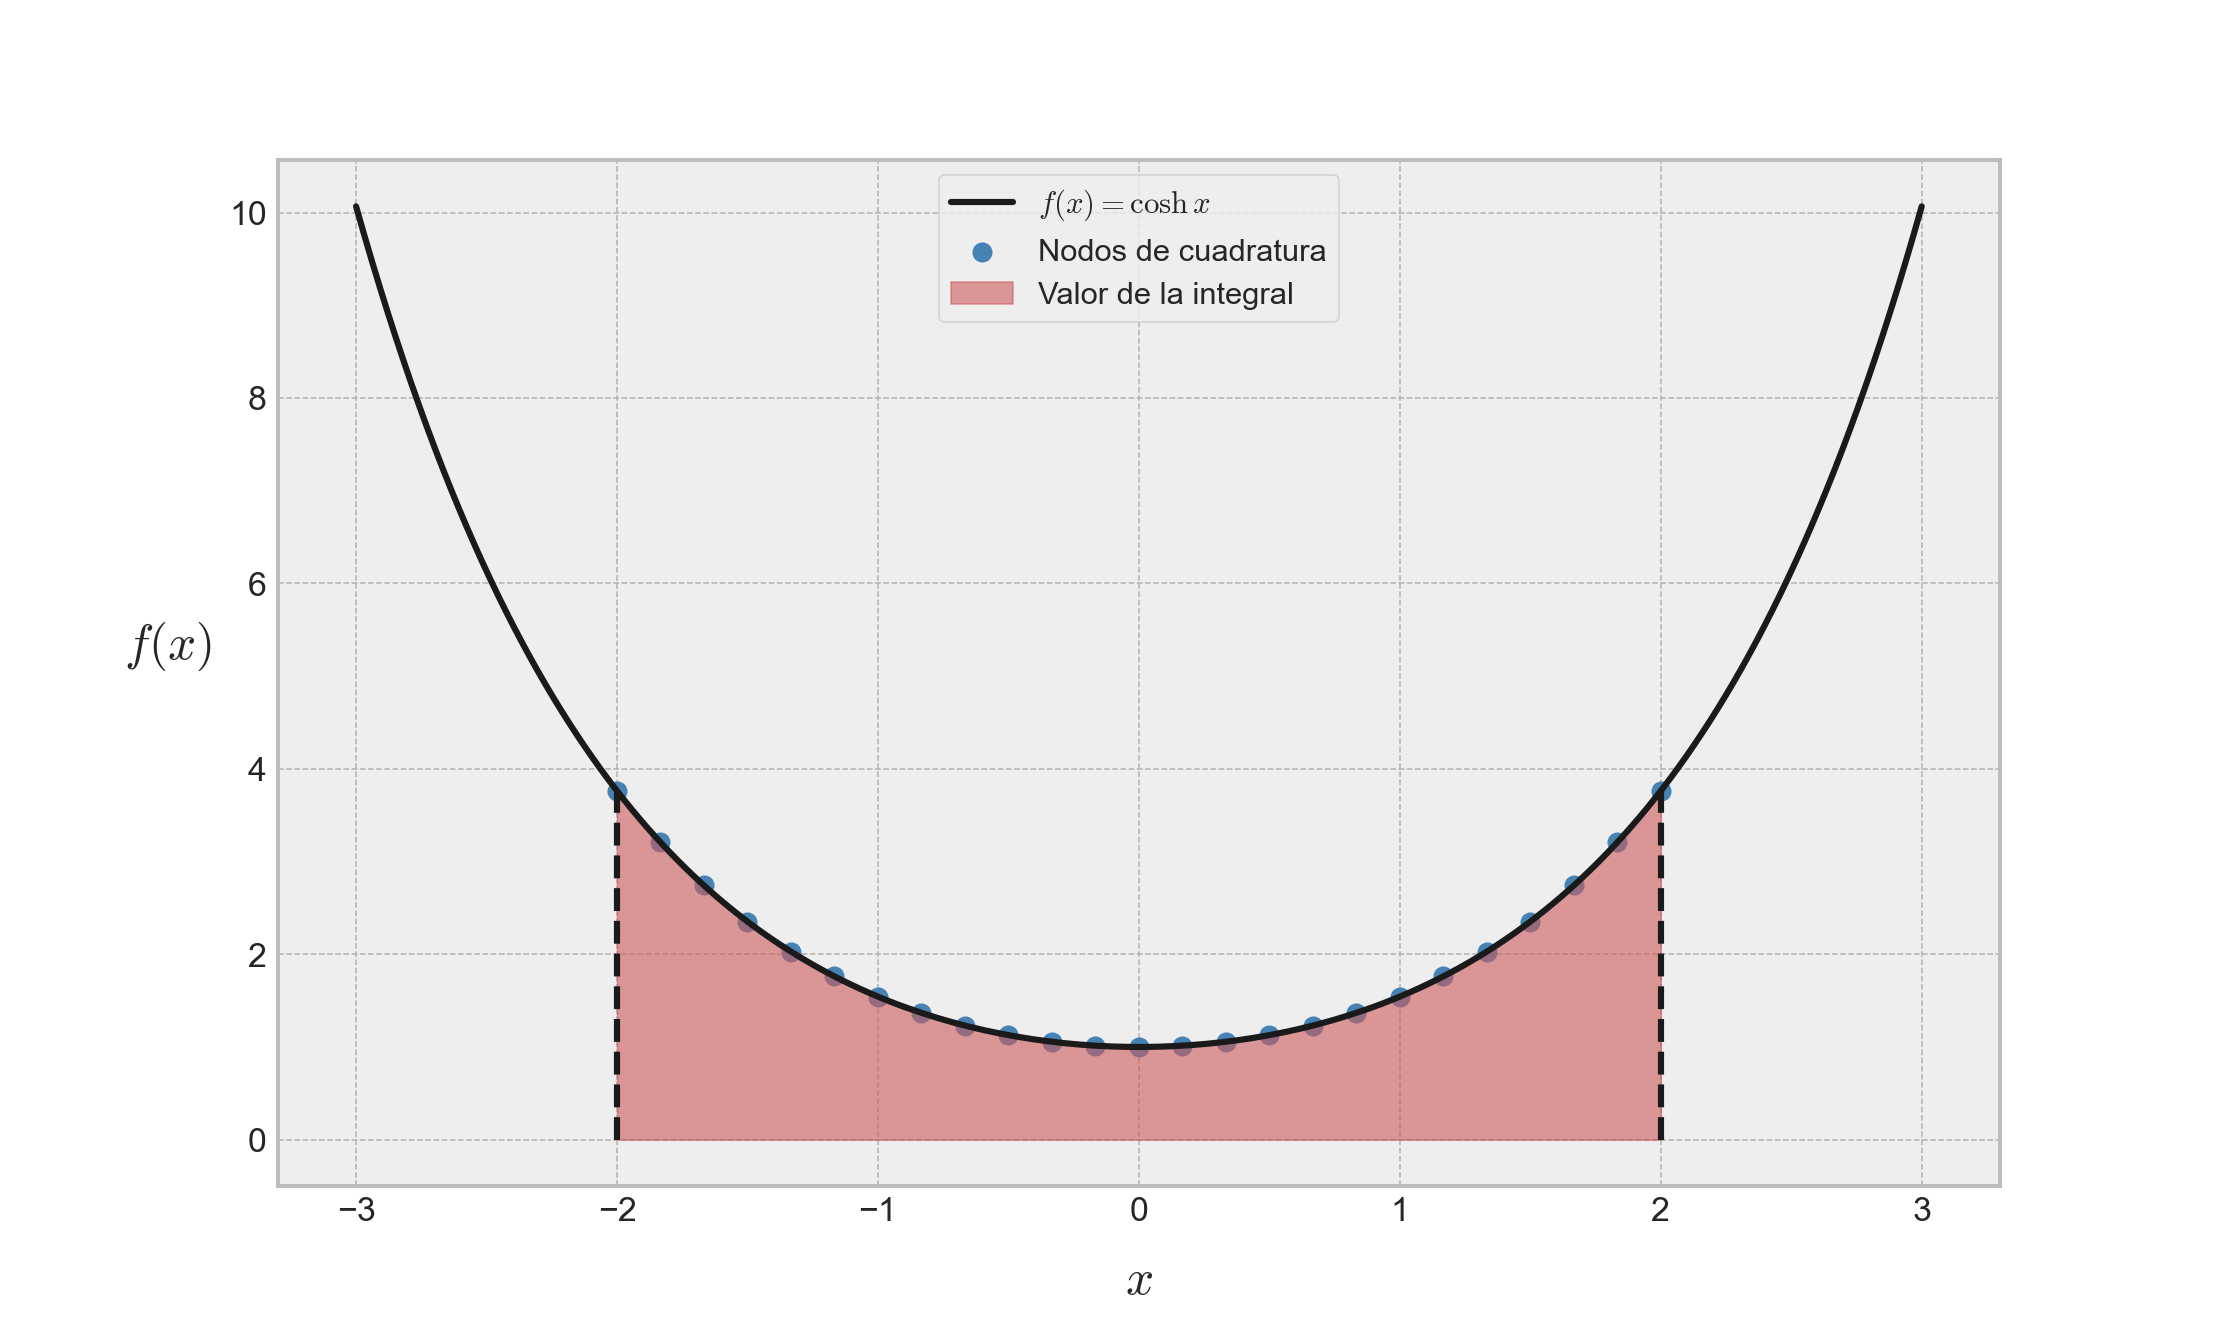

In [28]:
# Graficamos todo.
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, f(x), color="k", label=r"$f(x)=\cosh{x}$")
ax.scatter(q_nodes, f(q_nodes), color="steelblue", label="Nodos de cuadratura")
ax.fill_between(x=x0, y1=0, y2=xn, color="indianred", alpha=0.6, label="Valor de la integral")
ax.plot([a, a], [0, f(a)], linestyle="--", color="k")
ax.plot([b, b], [0, f(b)], linestyle="--", color="k")
ax.legend(loc="upper center", fontsize=10, frameon=True)
ax.set_xlabel(r"$x$", fontsize=16, labelpad=10)
ax.set_ylabel(r"$f(x)$", fontsize=16, labelpad=20, rotation=0);

Podemos observar que cualquier fórmula de cuadratura de Newton-Cotes hará uso únicamente de los nodos de cuadratura que han sido graficados previamente, obviando cualquier conocimiento relativo a la función $f$ que los ha generado. La implementación de las reglas compuestas previamente mencionadas es directa en este caso:

In [29]:
# Integración numérica por medio de la fórmula compuesta de los trapecios.
val_t = I.trapz(f(q_nodes), q_nodes)

In [30]:
# Integración numérica por medio de la regla compuesta de Simpson.
val_s = I.simps(f(q_nodes), q_nodes)

In [31]:
# Mostramos en pantalla los resultados.
print(f"Integral conforme la fórmula compuesta de los trapecios: {val_t}")
print(f"Integral conforme la regla compuesta de Simpson: {val_s}")

Integral conforme la fórmula compuesta de los trapecios: 7.2705040676178925
Integral conforme la regla compuesta de Simpson: 7.253751807649661


Debido a que, en general, no disponemos de la definición explícita del integrando, no es posible contar con una estimación del error de cuadratura asociado a los cálculos anteriores. Sin embargo, debido a que la regla compuesta de Simpson se construye sobre la interpolación del integrando mediante un spline cuadrático, en general, nos dará resultados más exactos.

En general, de todos los métodos de integración revisados en esta primera parte, probablemente la regla compuesta de Simpson sea la que mejor balancee exactitud versus tiempo de ejecución, ya que sólo requiere de data tabular para la evaluación de las correspondientes integrales:

In [32]:
%timeit I.trapz(f(q_nodes), q_nodes)
%timeit I.simps(f(q_nodes), q_nodes)
%timeit I.quad(func=f, a=-2, b=2)

24.6 µs ± 319 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
81.7 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
29.3 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Integrales múltiples.
La teoría relativa a las fórmulas de cuadratura para integrales múltiples no está ni cerca de ser tan nutrida como en el caso de las integrales unidimensionales. Sin embargo, haremos el esfuerzo de introducirla a nivel muy superficial y únicamente para el caso de integrales dobles del tipo

$$I=\iint\limits_{S} f\left( x,y\right)  \psi \left( x\right)  \psi \left( y\right)  dS$$
</p> <p style="text-align: right;">$(5.19)$</p>

Donde $S$ es una región convexa de $\mathbb{R}^{2}$. El integrando suele tratarse como una función de densidad bivariable tal que las variables aleatorias (que asumiremos como Gaussianas) $X$ e $Y$ cuyas realizaciones son $x$ e $y$ tienen una correlación igual a cero. La función $\psi$ es llamada función de peso asociada a la integral doble (5.19). Queremos construir un esquema de cuadratura Gaussiana con $n\times n$ evaluaciones funcionales a partir de un esquema de cuadratura Gaussiana unidimensional con nodos $x_{k}$ y pesos $w_{k}$, donde $n$ es el número total de puntos sobre los cuales evaluaremos el integrando $f$. La fórmula resultante de este esquema tiene la forma

$$\iint\limits_{S} f\left( x,y\right)  \psi \left( x\right)  \psi \left( y\right)  dS\approx \sum^{n}_{i=1} \sum^{n}_{j=1} w_{i}w_{j}f\left( x_{i},x_{j}\right)$$
</p> <p style="text-align: right;">$(5.20)$</p>

El esquema (5.20) esencialmente muestrea la función $f$ sobre un conjunto de puntos que conforman una grilla rectangular completamente uniforme que cubre la región de integración $S$. Con frecuencia, se utilizan recursos tales como la *poda* de puntos en la grilla a fin de que, en vez de que ésta tenga una forma rectangular, cubra de manera aproximada el dominio $S$ completo, eliminando la mayor cantidad de puntos exteriores a $S$. De esta manera, es posible evitar que existan pesos de cuadratura demasiado pequeños para ciertos nodos.

No profundizaremos más en los aspectos teóricos relativos a las fórmulas de cuadratura multivariable. Por ahora nos bastará con saber que el módulo `scipy.integrate` dispone de funciones que nos permiten resolver integrales dobles y triples, e incluso integrales $n$-múltiples. Tales funciones corresponden a `dblquad()`, `tplquad()` y `nquad()`, las cuales son simplemente *wrappers* que implementan repetidamente la función `quad()` sobre cada una de las dimensiones de la integral múltiple de interés.

Partamos entonces con la resolución de integrales dobles. La función `dblquad()` permite resolver integrales dobles definidas explicitamente como

$$I=\int^{b}_{a} \int^{g_{2}\left( x\right)  }_{g_{1}\left( x\right)  } f\left( x,y\right)  dxdy$$
</p> <p style="text-align: right;">$(5.21)$</p>

Donde $g_{1}$ y $g_{2}$ son funciones continuas en el intervalo cerrado $[a, b]$. A fin de incorporar toda esta información, la función `dblquad()` hace uso de los siguientes argumentos:

- `func`, que corresponde a la función (`Callable`) que representa al integrando en cuestión.
- `a` y `b`, que son números de punto flotante que representan los límites de integración asociados a la integral exterior. Por convención, tales límites se asocian con la variable $x$ en la integral (5.21).
- `gfun`, que corresponde al límite inferior de integración asociado a la dimensión $y$ de la integral. En la ecuación (5.21), este parámetro se corresponde con la función $g_{1}(x)$. Este parámetro es, por tanto, de tipo `Callable`, al igual que `func`.
- `hfun`, que corresponde al límite superior de integración asociado a la dimensión $y$ de la integral. También es del tipo `Callable`, y se corresponde con la función $g_{2}(x)$ en la integral (5.21).

**Ejemplo 5.1:** Vamos a utilizar la función `dblquad()` para calcular la integral doble

$$I=\iint\limits_{S} e^{-\left( x^{2}+y^{2}\right)  }dS$$
</p> <p style="text-align: right;">$(5.22)$</p>

Donde $S$ es la región rectangular $S=\left\{ \left( x,y\right)  \in \mathbb{R}^{2} :0\leq x\leq 1\wedge 0\leq y\leq 1\right\}$.

En este caso, lo primero que haremos será definir explícitamente el integrando por medio de una función de Python:

In [33]:
# Definimos el integrando.
def f(x, y):
    return np.exp(-(x**2 + y**2))

Con propósitos netamente pedagógicos, vamos a graficar la región de integración en relación a la superficie que recorre el integrando `f`:

<IPython.core.display.Javascript object>


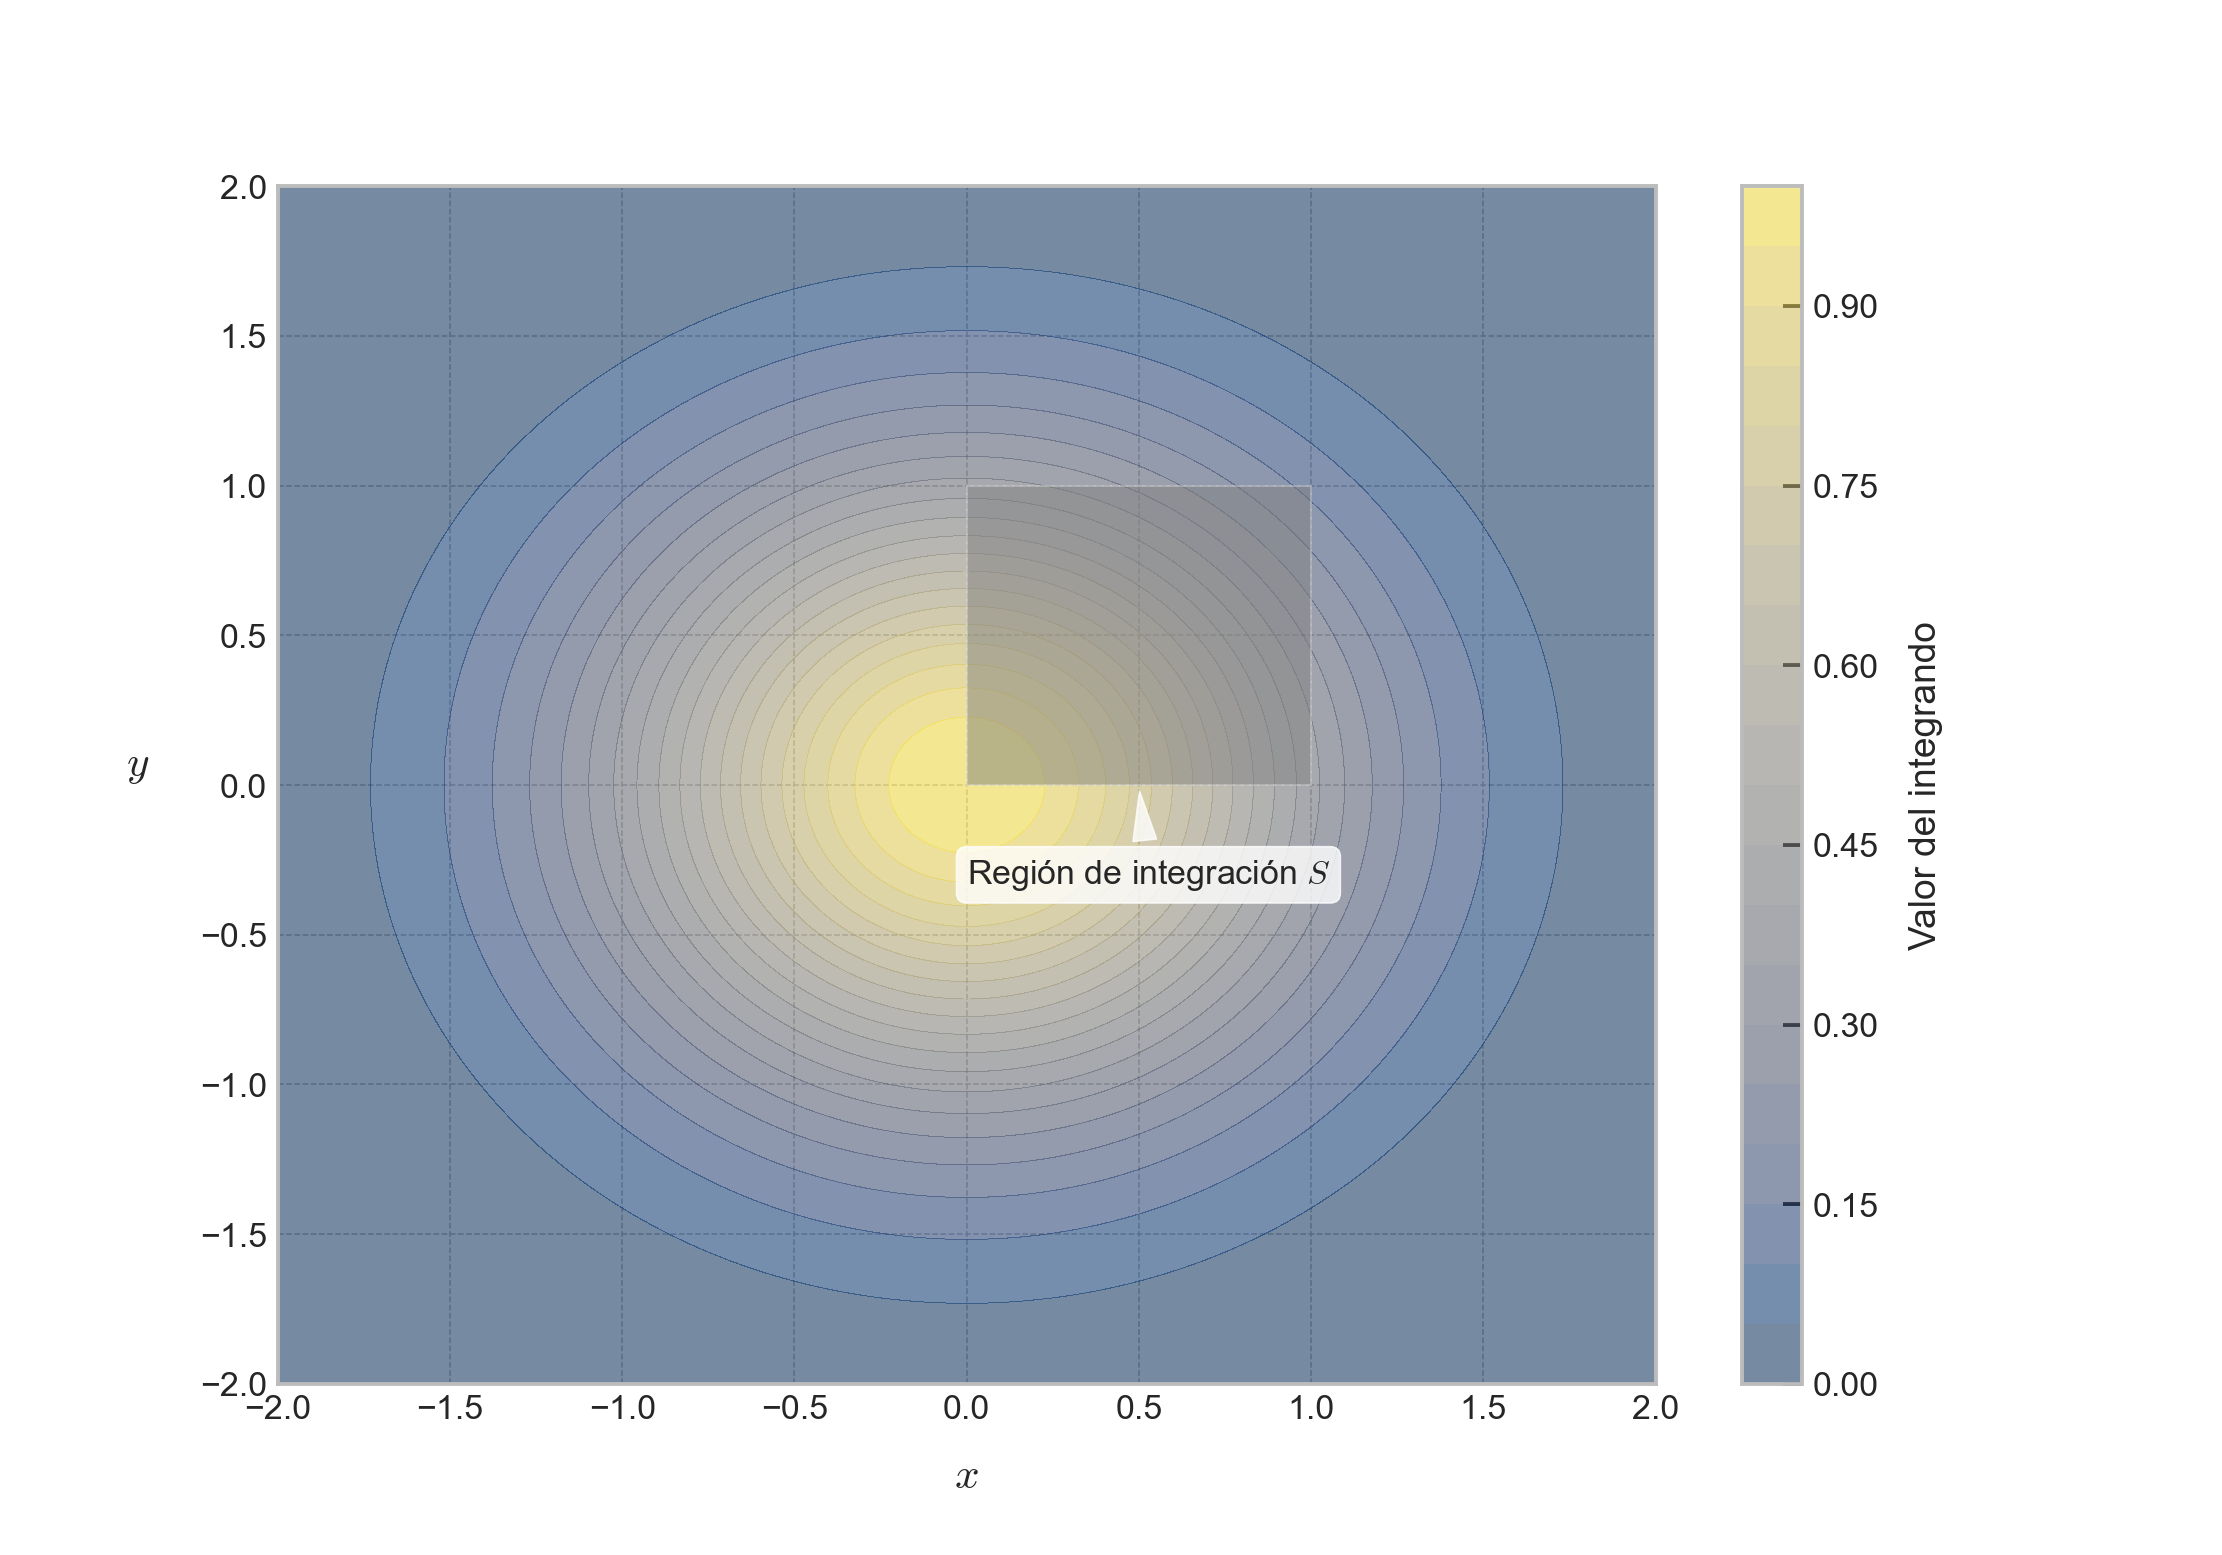

In [34]:
# Construimos una grilla que recubra parte del dominio de f.
x = np.linspace(start=-2, stop=2, num=200)
y = np.linspace(start=-2, stop=2, num=200)
X, Y = np.meshgrid(x, y)

# Y generamos el gráfico completo.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, f(X, Y), 20, cmap="cividis", alpha=0.5)
S = plt.Rectangle((0, 0), 1, 1, facecolor="gray", alpha=0.5)
ax.add_patch(S)
bbox = dict(boxstyle="round", alpha=0.8, color="white")
arrowprops = dict(color="white", arrowstyle="wedge,tail_width=0.7", alpha=0.8)
ax.annotate(
    text=r"Región de integración $S$", xy=(0.5, 0.0), xytext=(0.0, -0.3), size=11,
    va="center", arrowprops=arrowprops, bbox=bbox
)
cb = plt.colorbar(p)
cb.set_label("Valor del integrando", fontsize=12, labelpad=10)
ax.set_xlabel(r"$x$", fontsize=14, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=14, labelpad=20, rotation=0);

Debido a que la función `dblquad()` requiere de funciones (`Callable`) que definen los límites de la región de integración en la dimensión $y$, siempre es bueno, cuando tales límites son constantes, expresarlos mediante funciones anónimas, a fin de asegurar compatibilidad:

In [35]:
# Definimos los límites de la región de integración en la dimensión y.
g1 = lambda x: 0
g2 = lambda x: 1

Y ya podemos calcular nuestra integral:

In [36]:
# Cálculo de la integral doble.
result, err = I.dblquad(func=f, a=0, b=1, gfun=g1, hfun=g2)

In [37]:
# Imprimimos en pantalla nuestros resultados.
print(f"Valor aproximado de la integral: {result}")
print(f"Error de cuadratura: {err}")

Valor aproximado de la integral: 0.5577462853510337
Error de cuadratura: 8.291374381535408e-15


◼

**Ejemplo 5.2:** Vamos a utilizar la función `dblquad()` para calcular la integral doble

$$K=\iint\limits_{D} 2xy\  dxdy$$
</p> <p style="text-align: right;">$(5.23)$</p>

Donde $D$ es la región definida como $D=\left\{ \left( x,y\right)  \in \mathbb{R}^{2} :0\leq x\leq 4\wedge \sqrt{2x} \leq y\leq \sqrt{24-x^{2}} \right\}$. 

A fin de comprender el problema a cabalidad, podemos generar un gráfico de la región de integración:

In [38]:
# Construimos las funciones que limitan a la región D en la dimensión y.
def g1(x):
    return np.sqrt(2*x)

def g2(x):
    return np.sqrt(24 - x**2)

In [39]:
# Y construimos la grilla donde se dibujará la región de integración D.
x = np.linspace(start=0, stop=4, num=200)
y1, y2 = g1(x), g2(x)

<IPython.core.display.Javascript object>


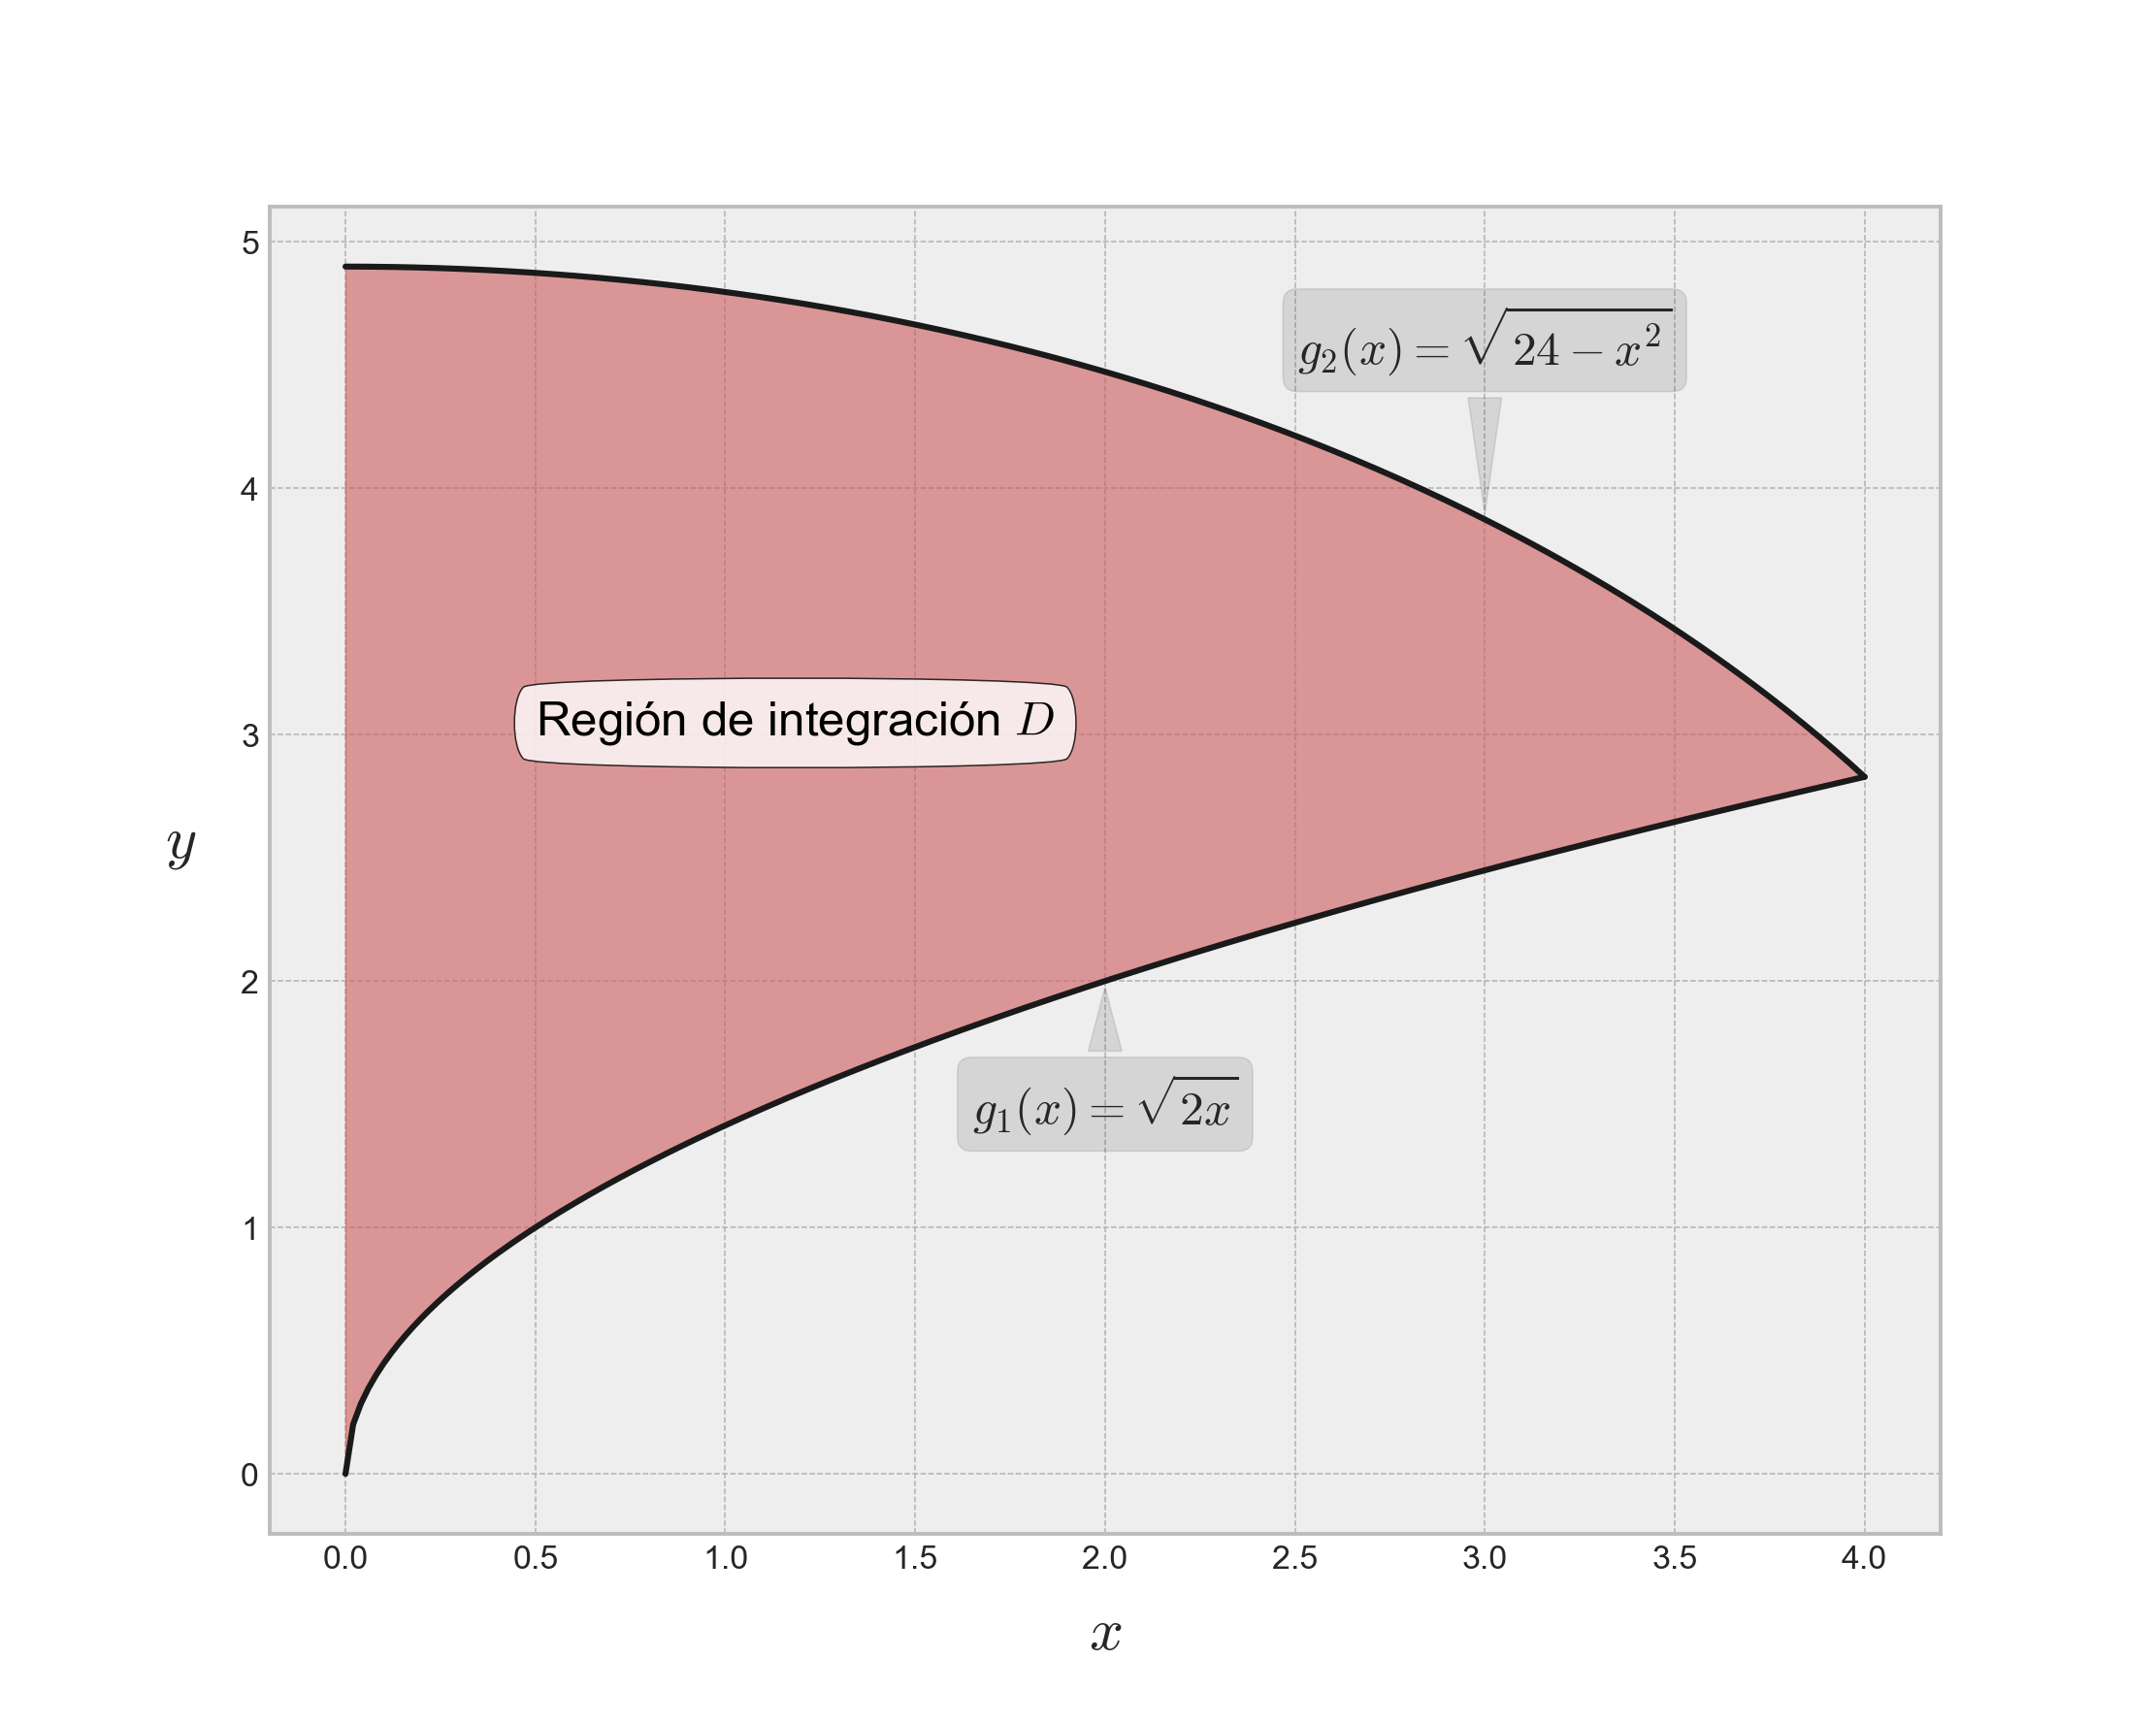

In [40]:
# Graficamos la región D.
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x, y1, color="k")
ax.plot(x, y2, color="k")
ax.fill_between(x=x, y1=y1, y2=y2, color="indianred", alpha=0.6)
bbox = dict(boxstyle="round", alpha=0.1, color="black")
arrowprops = dict(color="black", arrowstyle="wedge,tail_width=0.7", alpha=0.1)
ax.annotate(
    text=r"$g_{1}(x)=\sqrt{2x}$", xy=(2.0, g1(2.0)), xytext=(2.0, 1.5),
    size=16, va="center", ha="center", arrowprops=arrowprops, bbox=bbox
)
ax.annotate(
    text=r"$g_{2}(x)=\sqrt{24 - x^{2}}$", xy=(3.0, g2(3.0)), xytext=(3.0, 4.6),
    size=16, va="center", ha="center", arrowprops=arrowprops, bbox=bbox
)
ax.text(
    x=0.5, y=3, s=r"Región de integración $D$", size=16, color="black",
    bbox=dict(boxstyle="round4,pad=.5", alpha=0.8, fc="white", ec="black")
)
ax.set_xlabel(r"$x$", fontsize=20, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=20, labelpad=20, rotation=0);

Vemos pues que la región $D$ corresponde a la porción interior a la circunferencia $x^{2}+y^{2}=24$ que está por encima de la semiparábola superior $y^{2}-\sqrt{2x}=0$.

Podemos observar que la integral (5.23), a diferencia de lo que ocurre con la del Ejemplo 5.1, tiene límites en la dimensión $y$ definidos por medio de funciones, las que ya explicitamos en `g1` y `g2`. Sin embargo, el cálculo de esta integral doble por medio de `dblquad()` resulta igual de sencillo que el que hicimos previamente:

In [41]:
# Cálculo de la integral doble.
result, err = I.dblquad(func=lambda x, y: 2*x*y, a=0, b=4, gfun=g1, hfun=g2)

In [42]:
# Imprimimos en pantalla nuestros resultados.
print(f"Valor aproximado de la integral: {result}")
print(f"Error de cuadratura: {err}")

Valor aproximado de la integral: 85.33333333333333
Error de cuadratura: 9.473903143468001e-13


◼

El módulo `scipy.integrate` también nos provee de herramientas para el cálculo de integrales triples, haciendo uso de la función `tplquad()`. Para ello, consideraremos integrales de la forma

$$I=\iiint\limits_{\Omega } f\left( x,y,z\right)  d\Omega$$
</p> <p style="text-align: right;">$(5.24)$</p>

Donde $\Omega$ es una región acotada y convexa de $\mathbb{R}^3$ y el integrando $f$ es una función continua en $\Omega$. La región de integración $\Omega$ es, en este caso, tal que ésta puede descomponerse en las dimensiones $x$, $y$ y $z$, respectivamente, como 

$$\Omega =\left\{ \left( x,y,z\right)  \in \mathbb{R}^{3} :a\leq x\leq b\  ;\  g_{1}\left( x\right)  \leq y\leq g_{2}\left( x\right)  \  ;\  h_{1}\left( x,y\right)  \leq z\leq h_{2}\left( x,y\right)  \right\}$$

donde las funciones $g_{1}$, $g_{2}$, $h_{1}$ y $h_{2}$ son continuas en sus correspondientes dominios. De esta manera, la integral triple (5.24) puede reescribirse como

$$\iiint\limits_{\Omega } f\left( x,y,z\right)  d\Omega =\int^{b}_{a} \int^{g_{2}\left( x\right)  }_{g_{1}\left( x\right)  } \int^{h_{2}\left( x,y\right)  }_{h_{1}\left( x,y\right)  } f\left( x,y,z\right)  dxdydz$$
</p> <p style="text-align: right;">$(5.25)$</p>

La función `tplquad()` funciona de manera completamente análoga a la función `dblquad()`. Considerando la integral triple (5.25), `tplquad()` hará uso de los parámetros `func`, que hará las funciones del integrando (estando éste definido como una función de Python); `a` y `b`, que corresponderán a los límites de la región de integración en la dimensión $x$; `gfun` y `hfun`, que son funciones en la variable $x$ de Python que definen los límites de la región de integración en la dimensión $y$ (las funciones $g_{1}$ y $g_{2}$ en la integral (5.25)); y `qfun` y `rfun`, que son funciones en las variables $x$ e $y$, y que definen los límites de la región de integración en la dimensión $z$ (las funciones $h_{1}$ y $h_{2}$ en la integral (5.25)).

**Ejemplo 5.3:** Vamos a usar la función `tplquad()` para calcular la integral triple

$$K=\iiint\limits_{\Omega } e^{-\left( x^{2}+y^{2}+z^{2}\right)^{3/2}} d\Omega$$
</p> <p style="text-align: right;">$(5.26)$</p>

Donde $\Omega$ es la región interior, incluyendo la frontera, a la esfera $x^{2}+y^{2}+z^{2}=16$. Para ello, si bien esto no es necesario a la hora de calcular numéricamente las integrales de interés mediante la función `tplquad()`, siempre es bueno simplificar los integrandos y las regiones de integración involucradas a fin de tener menores tiempos de ejecución. De esta manera, podemos implementar un cambio de variables usando coordenadas esféricas sobre la integral $K$ aprovechando que $\Omega$ es una región igualmente esférica. Así, poniendo $x=\rho \  \mathrm{sen} \left( \theta \right)  \cos \left( \phi \right)$, $y=\rho \  \mathrm{sen} \left( \theta \right)  \mathrm{sen} \left( \phi \right)$ y $z=\rho \cos \left( \theta \right)$, se tendrá que el determinante Jacobiano asociado a este cambio será

$$\frac{\partial \left( x,y,z\right)  }{\partial \left( \rho ,\theta ,\phi \right)  } =\det \left( \begin{array}{ccc}\displaystyle \frac{\partial x}{\partial \rho } &\displaystyle \frac{\partial y}{\partial \rho } &\displaystyle \frac{\partial z}{\partial \rho } \\ \displaystyle \frac{\partial x}{\partial \theta } &\displaystyle \frac{\partial y}{\partial \theta } &\displaystyle \frac{\partial z}{\partial \theta } \\ \displaystyle \frac{\partial x}{\partial \phi } &\displaystyle \frac{\partial y}{\partial \phi } &\displaystyle \frac{\partial z}{\partial \phi } \end{array} \right)  =\det \left( \begin{array}{ccc}\mathrm{sen} \left( \theta \right)  \cos \left( \phi \right)  &\mathrm{sen} \left( \theta \right)  \mathrm{sen} \left( \phi \right)  &\cos \left( \theta \right)  \\ \rho \cos \left( \theta \right)  \cos \left( \phi \right)  &\rho \cos \left( \theta \right)  \mathrm{sen} \left( \phi \right)  &-\rho \  \mathrm{sen} \left( \theta \right)  \\ -\rho \  \mathrm{sen} \left( \theta \right)  \mathrm{sen} \left( \phi \right)  &\rho \  \mathrm{sen} \left( \theta \right)  \cos \left( \phi \right)  &0\end{array} \right)  =\rho^{2} \mathrm{sen} \left( \theta \right)$$
</p> <p style="text-align: right;">$(5.27)$</p>

Con esta descripción, la región de integración ahora toma la forma $\Omega =\left\{ \left( \rho ,\theta ,\phi \right)  \in \mathbb{R}^{3} :0\leq \rho \leq 4\  ;\  0\leq \theta \leq \pi \  ;\  0\leq \phi \leq 2\pi \right\}$. Por lo tanto, las integral (5.27) ahora puede escribirse como

$$K=\iiint\limits_{\Omega } e^{-\left( x^{2}+y^{2}+z^{2}\right)^{3/2}  }d\Omega =\int^{4}_{0} \int^{\pi }_{0} \int^{2\pi }_{0} \rho^{2} \mathrm{sen} \left( \theta \right)  e^{-\rho^{3/2} }d\rho d\theta d\phi$$
</p> <p style="text-align: right;">$(5.28)$</p>

Y ya podemos formular esta integral en `scipy.integrate`:

In [43]:
# Definimos el integrando.
def f(rho, theta, phi):
    return np.exp(-rho**(3/2)) * (rho**2 * np.sin(theta))

In [44]:
# Formulamos la integral y la resolvemos.
result, err = I.tplquad(
    func=f, a=0, b=4, gfun=lambda x: 0, hfun=lambda x: np.pi,
    qfun=lambda x, y: 0, rfun=lambda x, y: 2*np.pi
)

In [45]:
# Imprimimos en pantalla nuestros resultados.
print(f"Valor aproximado de la integral: {result}")
print(f"Error de cuadratura: {err}")

Valor aproximado de la integral: 5.333320420085302
Error de cuadratura: 9.717268000545224e-09


◼

## Solución de ecuaciones diferenciales ordinarias.
Una ecuación diferencial corresponde a una ecuación que relaciona una o más funciones desconocidas y sus derivadas. En contextos prácticos, tales funciones suelen representar cantidades físicas determinadas, mientras que sus derivadas representan sus tasas de cambio. Ejemplos de estas ecuaciones son los siguientes:

$$x^{2}\frac{d^{2}y}{dx^{2}} +x\frac{dy}{dx} +\left( x^{2}-\alpha^{2} \right)  y=0\  \  ;\  \  \alpha \in \mathbb{C}$$
</p> <p style="text-align: right;">$(5.29)$</p>

$$\frac{\partial T}{\partial t} -\beta \left( \frac{\partial^{2} T}{\partial x^{2}} +\frac{\partial^{2} T}{\partial y^{2}} +\frac{\partial^{2} T}{\partial z^{2}} \right)  =0\  \  ;\  \  \beta \in \mathbb{R}$$
</p> <p style="text-align: right;">$(5.30)$</p>

La ecuación diferencial (5.29) sólo contiene dos variables, $x$ e $y$, y es consecuentemente llamada **ecuación diferencial ordinaria (EDO)**, debido a que únicamente contiene derivadas unidimensionales. Por otro lado, la ecuación diferencial (5.30) relaciona las variables $t$, $x$, $y$ y $z$ con la función $T$ y sus correspondientes derivadas parciales, y es llamada por tanto **ecuación diferencial parcial (EDP)**.

Definimos además el **orden de una ecuación diferencial** conforme la derivada de mayor orden que aparece en la misma. De este modo, ambas ecuaciones diferenciales (5.29) y (5.30) son de segundo orden.

En general, una ecuación del tipo

$$F\left( x,y,\frac{dy}{dx} ,\frac{d^{2}y}{dx^{2}} ,...,\frac{d^{n}y}{dx^{n}} \right)  =0$$
</p> <p style="text-align: right;">$(5.31)$</p>

se denomina **EDO de orden $n$**. Bajo ciertas restricciones convenientes sobre la función $F$, es posible resolver la ecuación (5.31) explícitamente para $d^{n}y/dx^{n}$ en términos de las otras $n+1$ variables $x$, $y$, $dy/dx$, ..., $d^{n-1}y/dx^{n-1}$, obteniéndose

$$\frac{d^{n}y}{dx^{n}} =f\left( x,y,\frac{dy}{dx} ,...,\frac{d^{n-1}y}{dx^{n-1}} \right)$$
</p> <p style="text-align: right;">$(5.32)$</p>

En general, la mayoría de los textos especializados que versan sobre ecuaciones diferenciales asumen que ésto es siempre posible. De este modo, diremos que una función $\phi:I\longrightarrow \mathbb{R}$ es una solución de la ecuación diferencial (5.32) si la función $\phi$ es de clase $C^{n+1}$ para todo $x\in I$ y, además, se tiene que

$$\frac{d^{n}\phi }{dx^{n}} \left( x\right)  =f\left( x,\phi \left( x\right)  ,\frac{d\phi }{dx} \left( x\right)  ,...,\frac{d^{n-1}\phi }{dx^{n-1}} \left( x\right)  \right)$$
</p> <p style="text-align: right;">$(5.33)$</p>

### Conceptos preliminares.
Nos ocuparemos, en primera instancia, de estudiar algunos métodos computacionales que nos permitirán determinar soluciones como la esquematizada en (5.33) para resolver EDOs, ya sea mediante métodos de computación simbólica por medio de **Sympy**, cuando existan condiciones que permitan obtener una solución analíticamente cerrada, y también mediante métodos numéricos por medio de **Scipy** cuando tales soluciones no estén disponibles.

Un ejemplo clásico de EDO de primer orden corresponde a

$$\frac{dT}{dt} \left( t\right)  =-k\left( T\left( t\right)  -T_{s}\right)$$
</p> <p style="text-align: right;">$(5.34)$</p>

Y que es muy conocida en física e ingeniería, ya que representa la famosa *ley del enfriamiento de Newton*. Dicha ley describe la temperatura $T$ de un material en el tiempo $t$, en un entorno determinado cuya temperatura es $T_{s}$. Mediante métodos algebraicos, es posible determinar el conjunto solución de esta EDO, y que se define como $T\left( t\right)  =T_{0}+\left( T_{0}-T_{s}\right)  \exp \left( -kt\right)$, donde $T_{0}=T(0)$ es la temperatura inicial del cuerpo material.

Por otro lado, un ejemplo típico de EDO de segundo orden corresponde a

$$\frac{d^{2}x}{dt^{2}} +\frac{k}{m} x=0$$
</p> <p style="text-align: right;">$(5.35)$</p>

Y que es también muy conocida en física e ingeniería. La EDO (5.35) representa el movimiento vibratorio no amortiguado ni forzado de una partícula de masa $m$ que se desplaza con una elongación $x(t)$ en el tiempo $t$, siendo $k$ una constante positiva. La solución de la ecuación (5.35) es también algebraicamente cerrada, y tiene la forma $x\left( t\right)  =C_{1}\cos \left( t\sqrt{k/m} \right)  +C_{2}\  \mathrm{sen} \left( t\sqrt{k/m} \right)$, donde $C_{1}$ y $C_{2}$ son constantes reales.

Como comentamos previamente, en general siempre es posible expresar la solución de una EDO de orden $n$ en la forma (5.32). En particular, es posible reescribir dicha ecuación en su **forma estándar** introduciendo las $n$ funciones $y_{1}=y$, $y_{2}=dy/dx$, ..., $y_{n}=d^{n-1}y/dx^{n-1}$, lo que nos permite reescribir (5.32) como un sistema que puede expresarse matricialmente como

$$\underbrace{\frac{d}{dx} \left( \begin{array}{c}y_{1}\\ y_{2}\\ \vdots \\ y_{n-1}\\ y_{n}\end{array} \right)  }_{\frac{d\mathbf{y} }{dx} } =\underbrace{\left( \begin{array}{c}y_{2}\\ y_{3}\\ \vdots \\ y_{n}\\ g\left( x,y_{1},...,y_{n}\right)  \end{array} \right)  }_{\mathbf{f}\left( x,\mathbf{y} \left( x\right)  \right)  }$$
</p> <p style="text-align: right;">$(5.36)$</p>

Esta *forma estándar* resulta particularmente útil para la resolución numérica de EDOs. Con frecuencia, tales métodos toman la función vectorial $\mathbf{f}=({f_{1},...,f_{n}})=(y_{2},y_{3},...,g\left( x,y_{1},...,y_{n}\right))$ como la única entrada que especifica la ecuación diferencial en su totalidad. Por ejemplo, para el caso de la ecuación del movimiento armónico simple (5.35), ésta puede reescribirse como $g\left( x\left( t\right)  \right)  =-\frac{m}{k} \frac{d^{2}x}{dt^{2}} \left( t\right)$, con lo cual tendremos que $y_{1}=x$ e $y_{2}=dx(t)/dt$. De este modo, la forma estándar de la EDO (5.35) es

$$\frac{d}{dx} \left( \begin{array}{c}y_{1}\\ y_{2}\end{array} \right)  =\left( \begin{array}{c}y_{2}\\ -kg\left( y_{1}\right)  /m\end{array} \right)$$
</p> <p style="text-align: right;">$(5.37)$</p>

Si las componentes de la función $\mathbf{f}=(f_{1},...,_{n})$ son todas funciones lineales, entonces el sistema (5.36) puede escribirse en su *forma canónica* como

$$\frac{d\mathbf{y} \left( x\right)  }{dx} =\mathbf{A} \left( x\right)  \mathbf{y} \left( x\right)  +\mathbf{r} \left( x\right)$$
</p> <p style="text-align: right;">$(5.38)$</p>

Donde $\mathbf{A}(x)\in \mathbb{R}^{n\times n}$ es una matriz cuadrada de orden $n$ y $\mathbf{r}(x)\in \mathbb{R}^{n}$ es un vector que únicamente depende de $x$. En esta forma canónica, el vector $\mathbf{r}(x)$ es llamado *término de origen* del sistema (5.38), y éste se dirá **homogéneo** cuando $\mathbf{r}(x)=\mathbf{0}$. 

Los sistemas lineales de ecuaciones diferenciales constituyen un caso de gran interés en la teoría general de ecuaciones diferenciales, ya que pueden resolverse algebraicamente mediante la diagonalización de la matriz $\mathbf{A}(x)$. Asimismo, cuando la función $\mathbf{f}$ tiene componentes que no son necesariamente lineales, es posible derivar algunos métodos especiales para resolver el problema (5.36). No obstante, no existe ningún método general que permita resolver el sistema de ecuaciones diferenciales (5.36) que funcione para cualquier tipo de función $\mathbf{f}$ y, en estos casos, sólo podremos intentar aproximar las soluciones de interés mediante métodos numéricos.